In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
%run src/lg_model.py

In [15]:
lg = LinearGaussian()

In [16]:
a = lrm_analytic(lg)

In [17]:
a

1.000046629250375

A figure showing approximation of stability exponent at different levels of discretization.

In [18]:
D_vals = np.arange(5, 250, step=5)
discrete_exponent_vals = np.empty_like(D_vals, dtype=np.float64)

In [19]:
for d, D in enumerate(D_vals):
    discrete_exponent_vals[d] = lrm_discretized(lg, D=D)

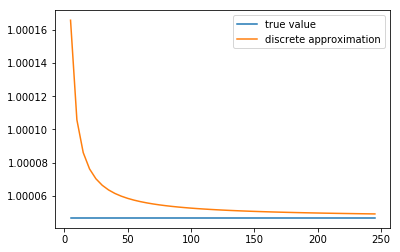

In [20]:
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False) 
#ax.set_ylim((a - 1.5 * 1e-8, a + 2 * 1e-9))
ax.plot(D_vals, np.ones_like(D_vals) * a, label="true value")
ax.plot(D_vals, discrete_exponent_vals, label="discrete approximation")
ax.legend()

A table that compares discretized val vs actual value for different values of the parameters

In [21]:
lg.γ

10.0

Preference params from SSY

In [22]:
β = 0.998
ψ = 1.5

In [23]:
D_vals = [5, 50, 100, 200]
gamma_vals = [7.5, 10, 12.5]

MC_table = np.empty((len(gamma_vals), len(D_vals) + 1))
Lambda_table = np.empty_like(MC_table)

In [24]:
for i, γ in enumerate(gamma_vals):
    lg = LinearGaussian(γ=γ)
    MC_table[i, 0] = lrm_analytic(lg)
    Lambda_table[i, 0] = lg.β * MC_table[i, 0]**(1 - 1/lg.ψ)
    for j, d in enumerate(D_vals):
        MC_table[i, j+1] = round(lrm_discretized(lg, D=d), 7)
        Lambda_table[i, j+1] = β * MC_table[i, j+1]**(1 - 1/ψ)

In [25]:
MC_table

array([[1.00045044, 1.0004998 , 1.0004549 , 1.0004527 , 1.0004516 ],
       [1.00004663, 1.0001658 , 1.0000584 , 1.0000525 , 1.0000496 ],
       [0.99964298, 0.9998662 , 0.9996673 , 0.9996552 , 0.9996491 ]])

In [26]:
def make_table(table):
    pd_table = pd.DataFrame(table)
    print(pd_table.to_latex(float_format=lambda x: '%1.7f' % x))

In [27]:
make_table(MC_table)

\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 & 1.0004504 & 1.0004998 & 1.0004549 & 1.0004527 & 1.0004516 \\
1 & 1.0000466 & 1.0001658 & 1.0000584 & 1.0000525 & 1.0000496 \\
2 & 0.9996430 & 0.9998662 & 0.9996673 & 0.9996552 & 0.9996491 \\
\bottomrule
\end{tabular}



In [28]:
make_table(Lambda_table)

\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 & 0.9981498 & 0.9981662 & 0.9981513 & 0.9981506 & 0.9981502 \\
1 & 0.9980155 & 0.9980552 & 0.9980194 & 0.9980175 & 0.9980165 \\
2 & 0.9978812 & 0.9979555 & 0.9978893 & 0.9978853 & 0.9978833 \\
\bottomrule
\end{tabular}



In [29]:
gamma_vals

[7.5, 10, 12.5]

In [32]:
lg = LinearGaussian(γ=1)

In [33]:
lrm_analytic(lg)

1.000046629250375